In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
scores = pd.read_excel('../data/results/master_results.xlsx',sheet_name=None)

In [4]:
scores['consolidated']

,ts,model_tag,model_dir,metric,score
0,2024-01-02 13:00:36,bert-base-uncased,NaN,crows-pairs,60.480000
1,2024-01-02 13:01:25,bert-base-uncased,NaN,stereoset,68.162956
2,2024-01-02 13:05:13,bert-base-uncased,NaN,crows-pairs,60.480000
3,2024-01-02 13:06:02,bert-base-uncased,NaN,stereoset,68.162956
4,2024-01-02 13:09:55,bert-base-uncased,NaN,crows-pairs,60.480000
...,...,...,...,...,...
143,2024-01-12 09:58:55,distilbert-base-uncased_random_init,random init,ceat,0.164209
144,2024-01-12 11:43:39,albert-base-v2,NaN,ceat,0.092961
145,2024-01-12 13:29:20,albert-base-v2_FT_4chan,/home/bhatt/ishan/TUM_Thesis/data/models/alber...,ceat,0.867227
146,2024-01-12 15:16:17,albert-base-v2_FT_imdb,/home/bhatt/ishan/TUM_Thesis/data/models/alber...,ceat,0.879179


In [5]:
cons = scores['consolidated']
cons.head()

,ts,model_tag,model_dir,metric,score
0,2024-01-02 13:00:36,bert-base-uncased,NaN,crows-pairs,60.480000
1,2024-01-02 13:01:25,bert-base-uncased,NaN,stereoset,68.162956
2,2024-01-02 13:05:13,bert-base-uncased,NaN,crows-pairs,60.480000
3,2024-01-02 13:06:02,bert-base-uncased,NaN,stereoset,68.162956
4,2024-01-02 13:09:55,bert-base-uncased,NaN,crows-pairs,60.480000


In [6]:
## Dropping all duplicated rows
cons = cons.drop_duplicates(subset=['model_tag','metric'],keep='last').sort_values('model_tag').reset_index(drop = True)

In [7]:
def separate_model_mode(x):
    # print(x)
    x = x.split('_')
    # print(x)
    if(len(x)==1):
        return 'base'
    else:
        if(x[-1]=='init'):
            return 'random'
        else:
            return x[-1]

In [8]:
cons[['model_tag','metric','score']].to_excel('../data/results/presentation/consolidated.xlsx',index=False)

In [9]:
df = pd.DataFrame(cons.loc[cons['metric']=='ceat'].groupby('model_tag')['score'].mean()).reset_index()
df['base_model_tag'] = df['model_tag'].apply(lambda x : x.split('_')[0])

for bmt in np.unique((df['base_model_tag'])):
    
    tmp = df.loc[df['base_model_tag']==bmt]
    # tmp.plot.barh(x='model_tag',y='score')

In [10]:
cp = scores['crows-pairs']
## Dropping all duplicated rows
cp = cp.drop_duplicates(subset=['model_name','metric'],keep='last').sort_values('model_name').reset_index(drop = True)
cp['base_model_tag'] = cp['model_name'].apply(lambda x : x.split('_')[0])
cp['model_mode'] = cp['model_name'].apply(lambda x : separate_model_mode(x))
cp.head()

,total_examples,metric_score,stereotype_score,anti-stereotype_score:,num_neutral,ts,model_name,model_dir,metric,base_model_tag,model_mode
0,1508,56.76,56.20,60.09,0,2024-01-05 12:45:16,albert-base-v2,NaN,crows-pairs,albert-base-v2,base
1,1508,51.26,51.86,48.17,2,2024-01-09 12:11:57,albert-base-v2_FT_4chan,/home/bhatt/ishan/TUM_Thesis/data/models/alber...,crows-pairs,albert-base-v2,4chan
2,1508,51.59,53.43,42.86,9,2024-01-09 14:04:48,albert-base-v2_FT_imdb,/home/bhatt/ishan/TUM_Thesis/data/models/alber...,crows-pairs,albert-base-v2,imdb
3,1508,46.29,46.61,46.30,9,2024-01-09 15:59:34,albert-base-v2_random_init,random init,crows-pairs,albert-base-v2,random
4,1508,55.11,55.89,50.46,0,2024-01-02 15:06:20,bert-base-cased,NaN,crows-pairs,bert-base-cased,base


In [19]:
cp[['anti-stereotype_score:','base_model_tag','model_mode']].pivot(index='base_model_tag',columns='model_mode',values='anti-stereotype_score:').to_excel('../data/results/presentation/consolidated.xlsx')

model_mode,4chan,base,imdb,random
base_model_tag,,,,
albert-base-v2,48.17,60.09,42.86,46.30
bert-base-cased,50.46,50.46,46.33,50.93
bert-base-uncased,56.22,56.88,51.83,42.66
distilbert-base-uncased,55.50,54.13,57.80,47.47
roberta-base,50.92,50.92,51.38,50.69


In [36]:
cp_long = pd.melt(cp,value_vars=['metric_score','stereotype_score','anti-stereotype_score:'],id_vars=['model_name','base_model_tag','model_mode'],
                  var_name = 'Score Type')
cp_long.head()

,model_name,base_model_tag,model_mode,Score Type,value
0,albert-base-v2,albert-base-v2,base,metric_score,56.76
1,albert-base-v2_FT_4chan,albert-base-v2,4chan,metric_score,51.26
2,albert-base-v2_FT_imdb,albert-base-v2,imdb,metric_score,51.59
3,albert-base-v2_random_init,albert-base-v2,random,metric_score,46.29
4,bert-base-cased,bert-base-cased,base,metric_score,55.11


Text(0.5, 1.0, 'Distribution of scores with CrowS-Pairs dataset for different model types.')

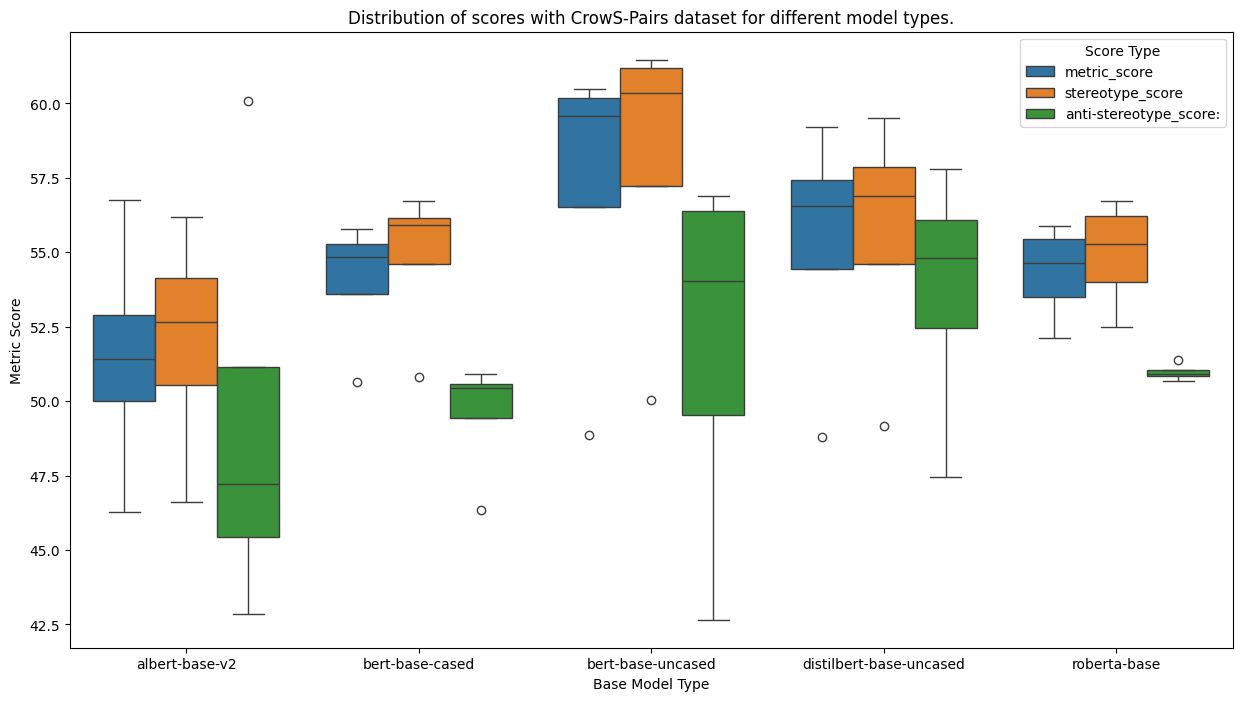

In [43]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x='base_model_tag', y='value', hue='Score Type', data=cp_long, ax = ax)
plt.xlabel('Base Model Type')
plt.ylabel('Metric Score')
plt.title('Distribution of scores with CrowS-Pairs dataset for different model types.')

Text(0.5, 1.0, 'Distribution of scores with CrowS-Pairs dataset for different model setups.')

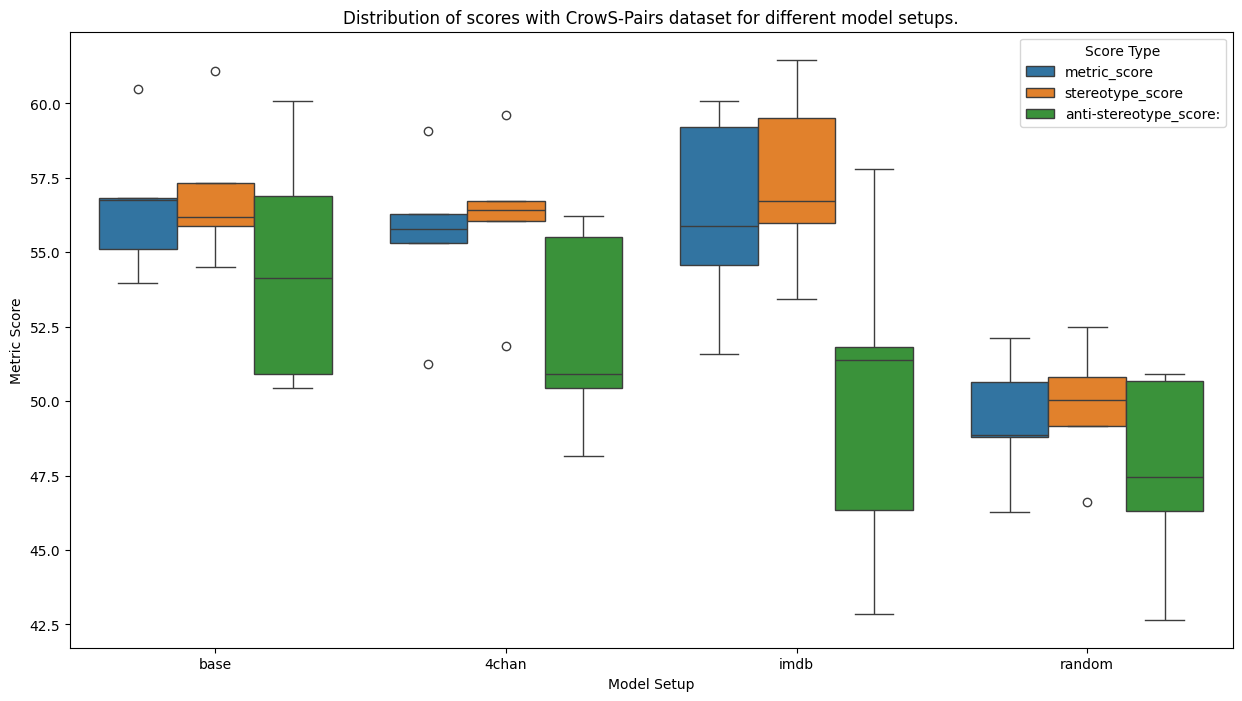

In [49]:
# cp.boxplot(column='metric_score',by='model_mode', figsize = (10,8))
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x='model_mode', y='value', hue='Score Type', data=cp_long, ax = ax)
plt.xlabel('Model Setup')
plt.ylabel('Metric Score')
plt.title('Distribution of scores with CrowS-Pairs dataset for different model setups.')

In [54]:
stereo = scores['stereoset']
## Dropping all duplicated rows
stereo = stereo.drop_duplicates(subset=['model_name','metric','category'],keep='last').sort_values('model_name').reset_index(drop = True)
stereo['base_model_tag'] = stereo['model_name'].apply(lambda x : x.split('_')[0])
stereo['model_mode'] = stereo['model_name'].apply(lambda x : separate_model_mode(x))
stereo.head()

,category,Count,LM Score,SS Score,ICAT Score,ts,model_name,model_dir,metric,base_model_tag,model_mode
0,gender,765,90.726705,63.576544,66.091604,2024-01-05 12:48:09,albert-base-v2,NaN,stereoset,albert-base-v2,base
1,profession,2430,90.079389,64.575036,63.821183,2024-01-05 12:48:09,albert-base-v2,NaN,stereoset,albert-base-v2,base
2,race,2886,91.617948,57.913567,77.117452,2024-01-05 12:48:09,albert-base-v2,NaN,stereoset,albert-base-v2,base
3,overall,2106,90.876888,61.293428,70.350657,2024-01-05 12:48:09,albert-base-v2,NaN,stereoset,albert-base-v2,base
4,religion,237,90.459770,61.425287,69.789193,2024-01-05 12:48:09,albert-base-v2,NaN,stereoset,albert-base-v2,base


In [55]:
stereo['category'].unique()

array(['gender', 'profession', 'race', 'overall', 'religion'],
      dtype=object)

Text(0.5, 1.0, 'Distribution of ICAT scores with StereoSet for different model setups.')

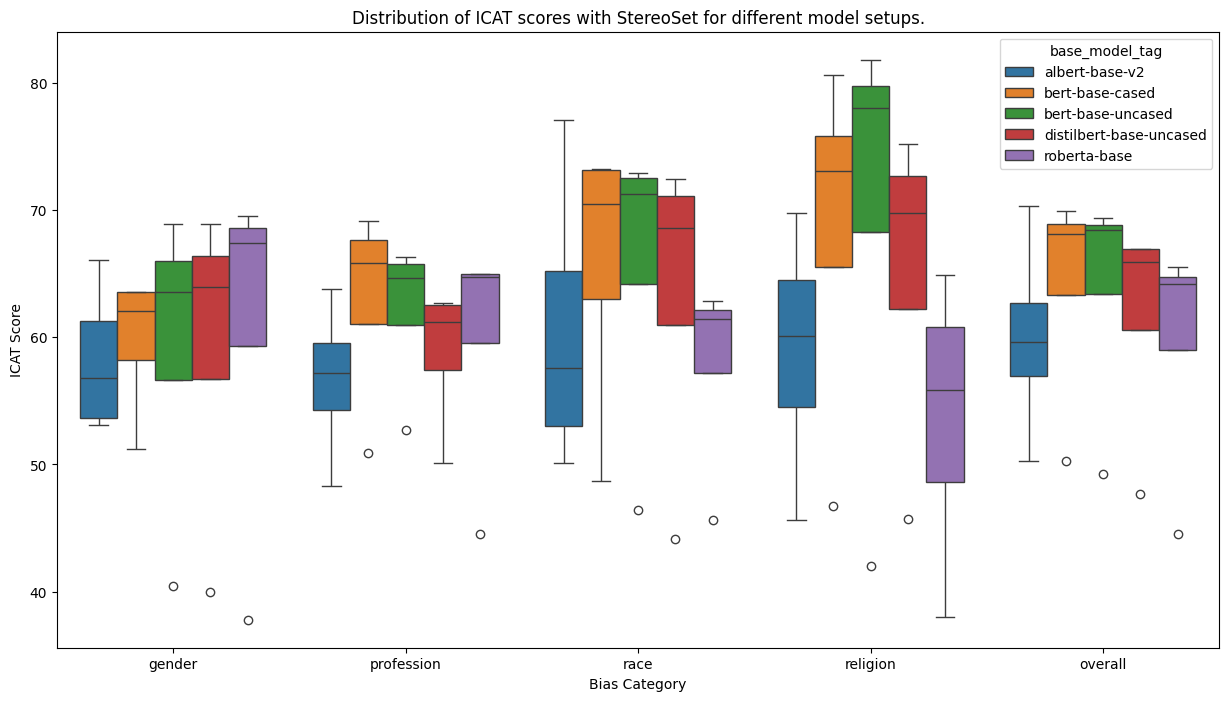

In [98]:
# stereo.boxplot(column='ICAT Score',by='model_mode',hue='category', figsize = (10,8))
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x='category', y='ICAT Score', hue='base_model_tag', data=stereo, ax = ax, order = ['gender', 'profession', 'race', 'religion', 'overall'])
plt.xlabel('Bias Category')
plt.ylabel('ICAT Score')
plt.title('Distribution of ICAT scores with StereoSet for different model setups.')

In [63]:
ceat = scores['ceat']
ceat['base_model_tag'] = ceat['model_name'].apply(lambda x : x.split('_')[0])
ceat['model_mode'] = ceat['model_name'].apply(lambda x : separate_model_mode(x))
ceat.head()

,group,PES,p-value,ts,model_name,model_dir,metric,base_model_tag,model_mode
0,1,0.501079,0.000000e+00,2024-01-02 17:36:21,bert-base-uncased,NaN,ceat,bert-base-uncased,base
1,2,0.516826,0.000000e+00,2024-01-02 17:36:21,bert-base-uncased,NaN,ceat,bert-base-uncased,base
2,3,0.329456,8.382907e-289,2024-01-02 17:36:21,bert-base-uncased,NaN,ceat,bert-base-uncased,base
3,4,0.366961,1.097725e-219,2024-01-02 17:36:21,bert-base-uncased,NaN,ceat,bert-base-uncased,base
4,5,0.000570,4.811871e-01,2024-01-02 17:36:21,bert-base-uncased,NaN,ceat,bert-base-uncased,base


In [75]:
ceat['group'] = ceat['group'].apply(lambda x : 'Group_'+str(x))

Text(0.5, 1.0, 'Distribution of CES scores with CEAT for different models.')

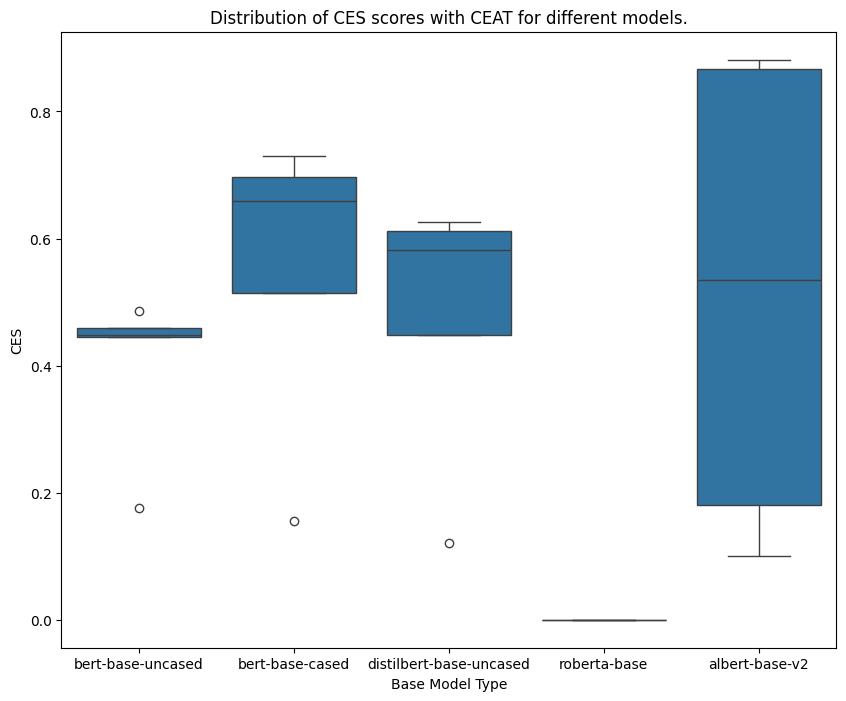

In [103]:
# fig, ax = plt.subplots(figsize=(10, 8))
# sns.boxplot(x='group', y='PES', hue='model_mode', data=ceat, ax = ax)
# ceat.boxplot(column='PES',by='model_mode', figsize = (10,8))
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x='base_model_tag', y='PES', data=ceat.loc[ceat['group']=='Group_0'], ax = ax)
plt.xlabel('Base Model Type')
plt.ylabel('CES')
plt.title('Distribution of CES scores with CEAT for different models.')

In [81]:
ceat['group'].unique()

array(['Group_1', 'Group_2', 'Group_3', 'Group_4', 'Group_5', 'Group_6',
       'Group_7', 'Group_8', 'Group_9', 'Group_10', 'Group_11',
       'Group_12', 'Group_13', 'Group_14', 'Group_0'], dtype=object)

In [109]:
ceat = ceat.rename(columns={'model_mode':'Model Setup','PES':'CES'})

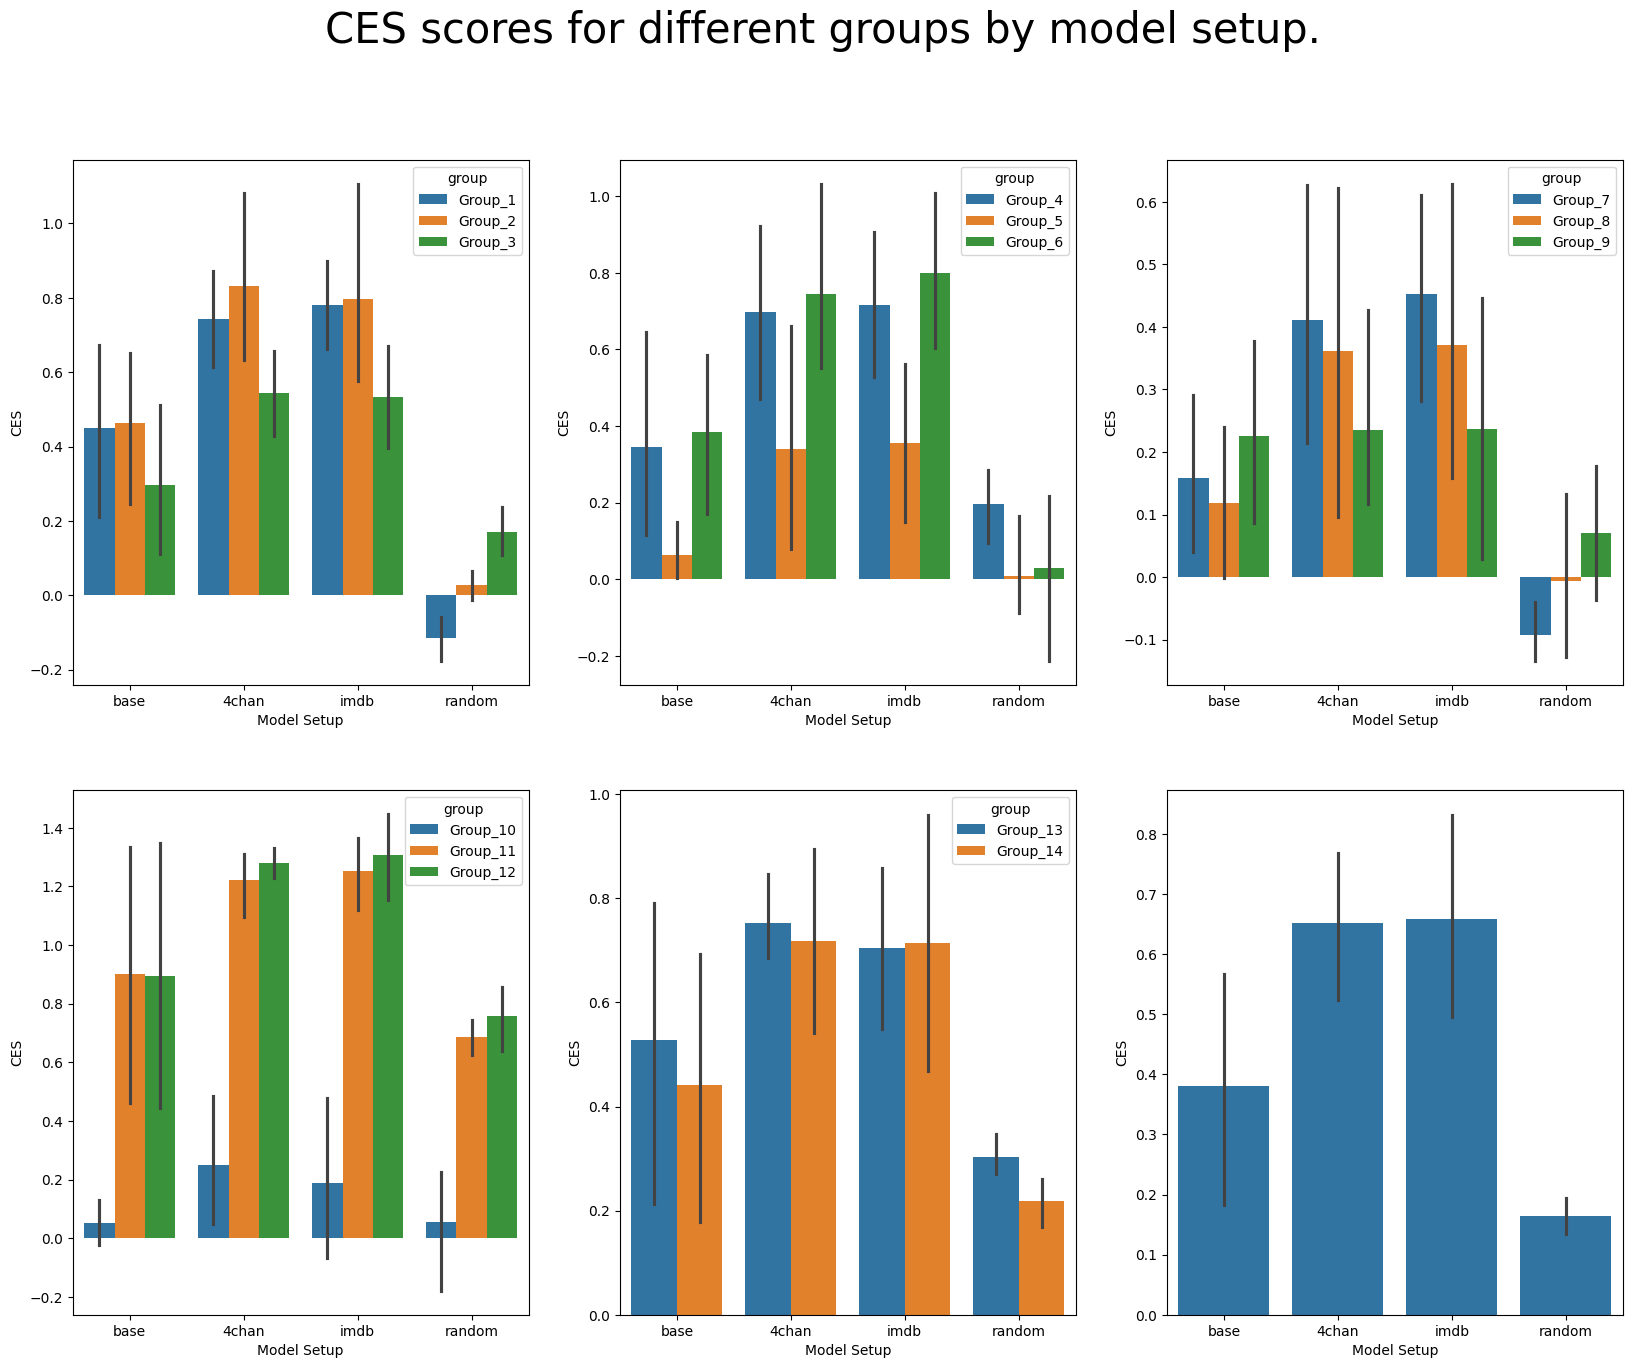

In [114]:
fig, ax = plt.subplots(2,3, figsize=(20, 15))

sns.barplot(x='Model Setup', y='CES', data=ceat.loc[ceat['group'].isin(['Group_1', 'Group_2', 'Group_3'])], hue = 'group' , ax = ax[0,0])
sns.barplot(x='Model Setup', y='CES', data=ceat.loc[ceat['group'].isin(['Group_4', 'Group_5', 'Group_6'])], hue = 'group' , ax = ax[0,1])
sns.barplot(x='Model Setup', y='CES', data=ceat.loc[ceat['group'].isin(['Group_7', 'Group_8', 'Group_9'])], hue = 'group' , ax = ax[0,2])
sns.barplot(x='Model Setup', y='CES', data=ceat.loc[ceat['group'].isin(['Group_10', 'Group_11', 'Group_12'])], hue = 'group' , ax = ax[1,0])
sns.barplot(x='Model Setup', y='CES', data=ceat.loc[ceat['group'].isin(['Group_13', 'Group_14'])], hue = 'group' , ax = ax[1,1])
sns.barplot(x='Model Setup', y='CES', data=ceat.loc[ceat['group'].isin(['Group_0'])], ax = ax[1,2])
# plt.xlabel('Model Setup')
# plt.ylabel('CES')
# plt.title('')
fig.suptitle('CES scores for different groups by model setup.', fontsize = 30)
plt.show()